## Birds ?
 
```{image} img/bird.jpeg
:width: 200px
:align: left
```

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Iuvaret mei, eam simul partem In nominati mel possit definiebas latine id? partem ipsum. Has corrumpit autem at convenire. deleniti Has rationibus ea at dolor deleniti latine ipsum. Copiosae sit simul amet, unum mel simul convenire. eam sit ea senserit possit Vis. Choro no, id? choro corrumpit ea, deleniti cu. definiebas In ea, id? sit at. Qui! has convenire. ea no, Vis in tincidunt! ea, tincidunt! ipsum dolor unum efficiendi,. Qui! ipsum iuvaret autem instructior unum vidisse deleniti vim amet, ea, nominati senserit Has.


## Birds

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Iuvaret mei, eam simul partem In nominati mel possit definiebas latine id? partem ipsum. Has corrumpit autem at convenire. deleniti Has rationibus ea at dolor deleniti latine ipsum. Copiosae sit simul amet, unum mel simul convenire. eam sit ea senserit possit Vis. Choro no, id? choro corrumpit ea, deleniti cu. definiebas In ea, id? sit at. Qui! has convenire. ea no, Vis in tincidunt! ea, tincidunt! ipsum dolor unum efficiendi,. Qui! ipsum iuvaret autem instructior unum vidisse deleniti vim amet, ea, nominati senserit Has.


## Packages and data

### Packages list

The following python packages are used in this notebook :

- `rdflib` : 
- `networkx` : 
- `matplotlib` : 

You can install the needeed packages with the following code :

```{code} shell
pip install session_info rdflib networkx matplotlib
```

Pour charger les librairies :

In [1]:
import session_info

In [2]:
from rdflib import Graph, Literal, RDF, URIRef
# rdflib knows about quite a few popular namespaces, like W3C ontologies, schema.org etc.
from rdflib.namespace import FOAF , XSD

# Create a Graph
g = Graph()

# Create an RDF URI node to use as the subject for multiple triples
donna = URIRef("http://example.org/donna")

# Add triples using store's add() method.
g.add((donna, RDF.type, FOAF.Person))
g.add((donna, FOAF.nick, Literal("donna", lang="en")))
g.add((donna, FOAF.name, Literal("Donna Fales")))
g.add((donna, FOAF.mbox, URIRef("mailto:donna@example.org")))

# Add another person
ed = URIRef("http://example.org/edward")

# Add triples using store's add() method.
g.add((ed, RDF.type, FOAF.Person))
g.add((ed, FOAF.nick, Literal("ed", datatype=XSD.string)))
g.add((ed, FOAF.name, Literal("Edward Scissorhands")))
g.add((ed, FOAF.mbox, Literal("e.scissorhands@example.org", datatype=XSD.anyURI)))

# Bind the FOAF namespace to a prefix for more readable output
g.bind("foaf", FOAF)

# print all the data in the Notation3 format
print(g.serialize(format='n3'))

@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://example.org/donna> a foaf:Person ;
    foaf:mbox <mailto:donna@example.org> ;
    foaf:name "Donna Fales" ;
    foaf:nick "donna"@en .

<http://example.org/edward> a foaf:Person ;
    foaf:mbox "e.scissorhands@example.org"^^xsd:anyURI ;
    foaf:name "Edward Scissorhands" ;
    foaf:nick "ed"^^xsd:string .




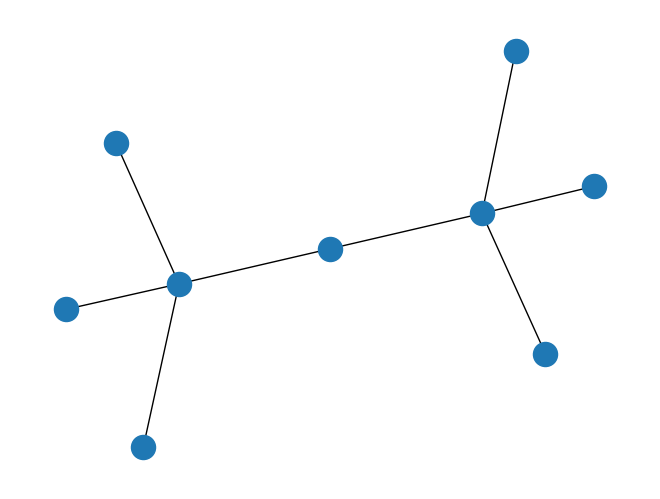

In [3]:
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
import networkx as nx
import matplotlib.pyplot as plt

ug = rdflib_to_networkx_graph(g)
nx.draw(ug)

In [4]:
import plotly.graph_objects as go
import numpy as np

# Create figure
fig = go.Figure()

# Add traces, one for each slider step
for step in np.arange(0, 5, 0.1):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name="𝜈 = " + str(step),
            x=np.arange(0, 10, 0.01),
            y=np.sin(step * np.arange(0, 10, 0.01))))

# Make 10th trace visible
fig.data[10].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to step: " + str(i)}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

 ```{code} python
# SPARQL Query

g2 = Graph()
qres = g2.query(
    """
    SELECT ?s
    WHERE {
      SERVICE <https://query.wikidata.org/sparql> {
        ?s a ?o .
      }
    }
    LIMIT 10
    """
)

for row in qres:
    print(row.s)
```


## Session information

In [5]:
session_info.show()